# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front of it.

## Get the data

The images we are working with are from Food101 dataset: https://www.kaggle.com/dansbecker/food-101

However we have modified it to use only 2 classes (using image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb )


**Note:** We start with a smaller dataset to see what works and what doesn't work before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-05-19 15:25:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  55.7MB/s    in 1.9s    

2021-05-19 15:25:33 (55.7 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



 ## Inspect the data (become one with it)

 A very crucial at the beginning at the beginning of any ML project is becoming one with the data

 And for a computer visison project we need to visualize it

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
# Walk through pizza_steak directory and list the no. of files

import os

for dirpath, dirnames, filenames in os.walk("pizza_steak/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 1 images in 'pizza_steak/'
There are 2 directories and 1 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 1 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


In [6]:
# The one image in the pizza_steak and train is a .DS_Store file. Hence ignore it

!ls -la pizza_steak/

total 24
drwxr-xr-x 4 root root 4096 May 19 15:25 .
drwxr-xr-x 1 root root 4096 May 19 15:25 ..
-rw-r--r-- 1 root root 6148 May 19 15:25 .DS_Store
drwxr-xr-x 4 root root 4096 May 19 15:25 test
drwxr-xr-x 4 root root 4096 May 19 15:25 train


In [7]:
# Another way to find out how many images are there in a file

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images lets first get the class names programmatically

In [8]:
# Get the class names programaticlly
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]  # remove .DS_store
class_names

array(['pizza', 'steak'], dtype='<U9')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

    # Setup the target directory 
    target_folder = target_dir +  target_class

    # Get a rando image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read the image and plot using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # Show the shape of the image
    return img


['1508094.jpg']
Image shape: (512, 512, 3)


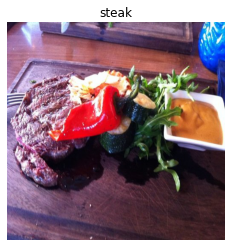

In [10]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class = "steak")

['1906287.jpg']
Image shape: (512, 512, 3)


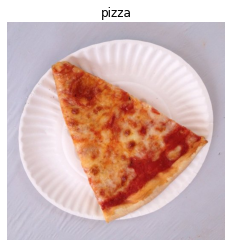

In [11]:
# View a random image from training dataset for pizza
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class = "pizza")

In [12]:
img # the mpimg library imported converts the image into a array

array([[[193, 186, 202],
        [191, 184, 200],
        [189, 182, 198],
        ...,
        [187, 184, 193],
        [186, 183, 192],
        [185, 182, 191]],

       [[191, 187, 202],
        [189, 185, 200],
        [187, 183, 198],
        ...,
        [187, 184, 193],
        [187, 184, 193],
        [187, 184, 193]],

       [[189, 185, 200],
        [188, 184, 199],
        [186, 182, 197],
        ...,
        [186, 183, 192],
        [187, 184, 193],
        [188, 185, 194]],

       ...,

       [[197, 193, 207],
        [196, 192, 206],
        [195, 191, 205],
        ...,
        [187, 180, 188],
        [185, 178, 186],
        [181, 174, 182]],

       [[195, 191, 205],
        [194, 190, 204],
        [193, 189, 203],
        ...,
        [184, 177, 185],
        [182, 175, 183],
        [180, 173, 181]],

       [[196, 192, 206],
        [195, 191, 205],
        [195, 191, 205],
        ...,
        [181, 174, 182],
        [180, 173, 181],
        [180, 173, 181]]

In [13]:
img.dtype

dtype('uint8')

In [14]:
import tensorflow as tf
tf.constant(img).shape

TensorShape([512, 512, 3])

In [15]:
# View the image shape
img.shape # returns a width, height , color channel

(512, 512, 3)

In [16]:
img/225.0  ## Normalizeing it

array([[[0.85777778, 0.82666667, 0.89777778],
        [0.84888889, 0.81777778, 0.88888889],
        [0.84      , 0.80888889, 0.88      ],
        ...,
        [0.83111111, 0.81777778, 0.85777778],
        [0.82666667, 0.81333333, 0.85333333],
        [0.82222222, 0.80888889, 0.84888889]],

       [[0.84888889, 0.83111111, 0.89777778],
        [0.84      , 0.82222222, 0.88888889],
        [0.83111111, 0.81333333, 0.88      ],
        ...,
        [0.83111111, 0.81777778, 0.85777778],
        [0.83111111, 0.81777778, 0.85777778],
        [0.83111111, 0.81777778, 0.85777778]],

       [[0.84      , 0.82222222, 0.88888889],
        [0.83555556, 0.81777778, 0.88444444],
        [0.82666667, 0.80888889, 0.87555556],
        ...,
        [0.82666667, 0.81333333, 0.85333333],
        [0.83111111, 0.81777778, 0.85777778],
        [0.83555556, 0.82222222, 0.86222222]],

       ...,

       [[0.87555556, 0.85777778, 0.92      ],
        [0.87111111, 0.85333333, 0.91555556],
        [0.86666667, 0

## An end to end example

Let's build a convolutional neural network to find patterns in our images. We need to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our mode
* Fit the model on the training data


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 0 and 1. This is called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to data directories (copy the path)
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                      
])



# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_1 = model_1.fit(train_data,  # The flow_from_directory already creates the train fdata and labels and hence we can pass it along just like that
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 264ms/step - loss: 0.6531 - accuracy: 0.6191 - val_loss: 0.4121 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4385 - accuracy: 0.8024 - val_loss: 0.3404 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3638 - accuracy: 0.8513 - val_loss: 0.3169 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3518 - accuracy: 0.8501 - val_loss: 0.3478 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3137 - accuracy: 0.8833 - val_loss: 0.3635 - val_accuracy: 0.8320


In [18]:
# The time taken to run without GPU (without hardware accelerator)

# Epoch 1/5
# 47/47 [==============================] - 96s 2s/step - loss: 0.6337 - accuracy: 0.6263 - val_loss: 0.3676 - val_accuracy: 0.8280
# Epoch 2/5
# 32/47 [===================>..........] - ETA: 27s - loss: 0.4547 - accuracy: 0.7910
# ---------------------------------------------------------------------------

**Note:** If the above cell is taking more than about 10-20 sec. per epochs than make sure to use GUP
Reuntime -> Change Runtime -> Hardware Accelerator -> GPU (you may have to run the entire code again)

In [19]:
len(train_data)

47

In [20]:
1500/32 #1500 images and 32 is batch size

46.875

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before (from the tendorflow playground)

Let's replicate the model built previously from the classification lecture.



In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate tensorflow playground model
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# Compile data
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
histroy_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 1.6484 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6935 - accuracy: 0.4870 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6931 - accuracy: 0.5183 - val_loss: 0.6932 - val_accuracy: 0.5000


In [23]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite of having about 20X more parameters than out=r CNN model (model_1)
we had a worse performing model.
Let's try improving it|

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model to improve on model_2
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)


# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 3.1433 - accuracy: 0.6076 - val_loss: 0.7667 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.7517 - accuracy: 0.7336 - val_loss: 0.9879 - val_accuracy: 0.5900
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 1.2809 - accuracy: 0.6417 - val_loss: 0.4817 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6200 - accuracy: 0.7558 - val_loss: 0.9783 - val_accuracy: 0.5360
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.7562 - accuracy: 0.6981 - val_loss: 0.4827 - val_accuracy: 0.7740


In [25]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [26]:
15000000/31000 # 15 million parameters in model_3 and 31 thousand in model_1

483.8709677419355

## Binary Classification: Breaking it down

1. Become one with the data (visualize)
2. Preprocess the data (scale/ normalize, turn into batches, etc)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Reapeat unit satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2771149.jpg']
Image shape: (512, 512, 3)
['395034.jpg']
Image shape: (384, 512, 3)


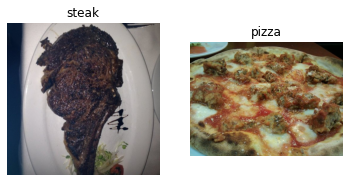

In [27]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_ima = view_random_image("pizza_steak/train/", "pizza")

On own

In [28]:
os.listdir("pizza_steak/train/pizza")

['2952219.jpg',
 '2711828.jpg',
 '1870865.jpg',
 '2700543.jpg',
 '1688838.jpg',
 '1008941.jpg',
 '1327402.jpg',
 '596494.jpg',
 '514014.jpg',
 '141507.jpg',
 '1173913.jpg',
 '3704879.jpg',
 '3401720.jpg',
 '608085.jpg',
 '1143057.jpg',
 '2078208.jpg',
 '3822139.jpg',
 '3366256.jpg',
 '299535.jpg',
 '340814.jpg',
 '2849924.jpg',
 '370643.jpg',
 '1234172.jpg',
 '3554287.jpg',
 '2534774.jpg',
 '89892.jpg',
 '1973447.jpg',
 '134462.jpg',
 '3693710.jpg',
 '2760984.jpg',
 '792093.jpg',
 '790841.jpg',
 '2190018.jpg',
 '3749515.jpg',
 '3826377.jpg',
 '452989.jpg',
 '259449.jpg',
 '3342039.jpg',
 '3326344.jpg',
 '3191035.jpg',
 '3678290.jpg',
 '1284978.jpg',
 '670201.jpg',
 '2639094.jpg',
 '765000.jpg',
 '233143.jpg',
 '1008844.jpg',
 '2671508.jpg',
 '1593835.jpg',
 '947246.jpg',
 '2010437.jpg',
 '1033251.jpg',
 '228778.jpg',
 '1717790.jpg',
 '1944600.jpg',
 '626902.jpg',
 '1881674.jpg',
 '1426781.jpg',
 '3675128.jpg',
 '970073.jpg',
 '2902766.jpg',
 '1839077.jpg',
 '1425089.jpg',
 '665900.jpg'

In [29]:
random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0]

'163039.jpg'

In [30]:
mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0]))

array([[[ 15,   5,   6],
        [ 15,   5,   6],
        [ 15,   5,   6],
        ...,
        [  3,   4,   8],
        [  3,   4,   8],
        [  3,   4,   8]],

       [[ 18,   8,   9],
        [ 18,   8,   9],
        [ 17,   7,   8],
        ...,
        [  2,   3,   7],
        [  2,   3,   7],
        [  3,   4,   8]],

       [[ 16,   7,   8],
        [ 17,   8,   9],
        [ 17,   8,   9],
        ...,
        [  1,   2,   6],
        [  2,   3,   7],
        [  2,   3,   7]],

       ...,

       [[123,  72,  17],
        [127,  74,  20],
        [124,  71,  17],
        ...,
        [210, 161, 118],
        [212, 160, 121],
        [211, 159, 122]],

       [[130,  78,  20],
        [127,  75,  17],
        [122,  67,  10],
        ...,
        [209, 159, 110],
        [206, 155, 110],
        [206, 154, 114]],

       [[136,  84,  24],
        [132,  78,  18],
        [129,  75,  15],
        ...,
        [207, 155, 105],
        [198, 146,  99],
        [196, 143,  99]]

Text(0.5, 1.0, 'Pizza')

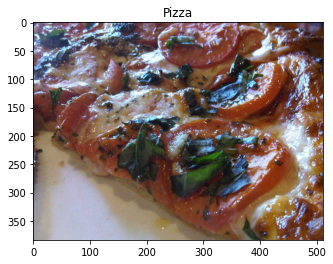

In [31]:
plt.imshow(mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0])))
plt.title("Pizza")

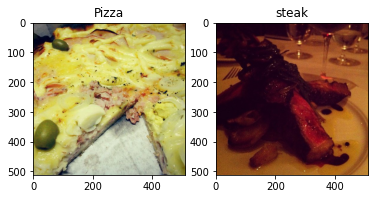

In [32]:
plt.subplot(1,2,1)
plt.imshow(mpimg.imread("pizza_steak/train/pizza" + "/" + (random.sample(os.listdir("pizza_steak/train/pizza"), 1)[0])))
plt.title("Pizza")
plt.subplot(1,2,2)
plt.imshow(mpimg.imread("pizza_steak/train/steak" + "/" + (random.sample(os.listdir("pizza_steak/train/steak"), 1)[0])))
plt.title("steak");

On own end

### 2. Preprocess the data (Prepare it for the model)

In [33]:
# Define directory dataset paths
tarin_dir = "pizza_steak/train/"
test_dir =  "pizza_steak/test/"

In [34]:
!nvidia-smi

Wed May 19 15:28:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    76W / 149W |   1799MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Our next step is to turn data into **batches**

It is a small subset of data. So, for instance, instead of looking at 10000 data together, it might look at 32 or 64 at a time.


The reasons for doing so is:

1. 10000 or more data (images here) may not fir into the memory of our processor (GPU or CPU)

2. Trying to learn the patterns in 10000 images, say, in one hit may result in model not being able to learn very well.



Why 32?
Because it is goood for your health.. Tweet : https://twitter.com/ylecun/status/989610208497360896?s=20




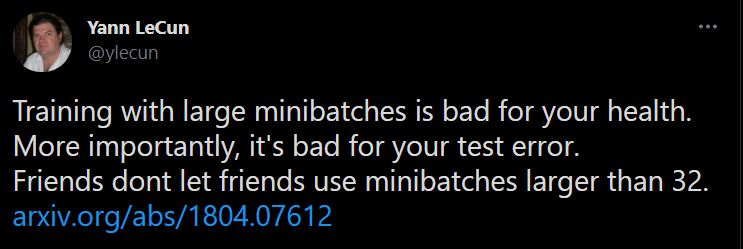

In [35]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

In [36]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary', 
                                               batch_size=32, 
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
# Get a sample of training batch 
images, labels = train_data.next() # Get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [38]:
images[0], labels[0]

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.31764707, 0.3254902 , 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34901962, 0.37254903],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.37647063],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.37254903, 0.39607847, 0.29411766],
         [0.39607847, 0.41960788, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.3019608 ],
         [0.30980393, 0.29803923, 0.27058825],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

In [39]:
# How many batches are there?
len(train_data)

47

In [40]:
1500/32  # 1500 images divided into 32 batches and rounded up

46.875

In [41]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [42]:
images[7].shape

(224, 224, 3)

In [43]:
# View the labels for the firt batch
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)


A baseline is a relatively simple model or existing result that we setup when beginning ML experimentation and then build it up iteratively



**Note:** In deep learning, there's always an infinite amount of architectures one could create. So start with a simple model and then build up a complexity

In [44]:
# MAke the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [46]:
# Create the model (this will be the baseline, a layer convolutional neural network)

model_4 = Sequential(
    [
     Conv2D(filters=10, # The number of sliding windows going over an input image. Higher the bnumber, more complex the model
            kernel_size=3, # The size of the sliding window across the input
            strides=1, # the size of the steps the sliding window takes across the image
            padding="valid", # if "same" output shape is same as input shape, if "valid" output is compressed
            activation="relu",
            input_shape=(224,224,3)),  ## Imput layer
     Conv2D(10,3, activation="relu"),
     Conv2D(10,3, activation="relu"),
     Flatten(),
     Dense(1, activation="sigmoid") # Output layer (working with binary classification hence only one neuron)
    ]
)